In [2]:
# For the following exercises, you'll need to load several datasets using the pydataset library. (If you get an error when trying to run the import below, use pip to install the pydataset package.)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pydataset import data
# When the instructions say to load a dataset, you can pass the name of the dataset as a string
# to the data function to load the dataset. You can also view the documentation for the data set by passing 
# the show_doc keyword argument.

mpg = data('mpg') # load the dataset and store it in a variable
# data('mpg', show_doc=True) # view the documentation for the dataset

In [3]:
#1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:
data('mpg', show_doc=True)


mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [4]:
# - On average, which manufacturer has the best miles per gallon?
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
def calculate_avg_mpg(df):
    avg = (df.cty + df.hwy) / 2
    return df.assign(average_mpg=avg)

mpg_df = mpg.pipe(calculate_avg_mpg)

mpg_df.groupby('manufacturer').average_mpg.mean().sort_values(ascending = False)

#honda of course

manufacturer
honda         28.500000
volkswagen    25.074074
hyundai       22.750000
subaru        22.428571
audi          22.027778
toyota        21.720588
pontiac       21.700000
nissan        21.346154
chevrolet     18.447368
ford          16.680000
mercury       15.625000
jeep          15.562500
dodge         15.540541
lincoln       14.166667
land rover    14.000000
Name: average_mpg, dtype: float64

In [6]:
# - How many different manufacturers are there?
mpg_df.groupby('manufacturer').model.count().shape

(15,)

In [7]:
# - How many different models are there?
mpg_df.groupby('model').model.count().shape

(38,)

In [8]:
# - Do automatic or manual cars have better miles per gallon?
mpg_df.groupby('trans').average_mpg.mean().sort_values(ascending = False)

trans
auto(l3)      24.000000
auto(av)      23.900000
manual(m5)    22.775862
auto(s4)      22.166667
auto(s5)      21.333333
auto(s6)      21.281250
manual(m6)    20.552632
auto(l4)      18.951807
auto(l5)      17.717949
auto(l6)      16.833333
Name: average_mpg, dtype: float64

In [9]:
#2. Joining and Merging
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
print(users,'\n')
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
print(roles)
#Copy the users and roles dataframes from the examples above. What do you think a right join would look like?

pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

   id   name  role_id
0   1    bob      1.0
1   2    joe      2.0
2   3  sally      3.0
3   4   adam      3.0
4   5   jane      NaN
5   6   mike      NaN 

   id       name
0   1      admin
1   2     author
2   3   reviewer
3   4  commenter


,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [10]:
# - An outer join?
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [11]:
# - What happens if you drop the foreign keys from the dataframes and try to merge them?
pd.merge(users, roles, how='right') 

,id,name,role_id
0,1,admin,NaN
1,2,author,NaN
2,3,reviewer,NaN
3,4,commenter,NaN


In [12]:
#3. Getting data from SQL databases

#a. Create a function named get_db_url. It should accept a username, hostname, password, and database name 
# and return a url formatted like in the examples in this lesson.
from env import host, user, password

db = 'employees' 

def get_db_url(user,host,passw,db):
    url = f'mysql+pymysql://{user}:{passw}@{host}/{db}'
    return url

In [13]:
#b. Use your function to obtain a connection to the employees database.
emp_url = get_db_url(user,host,password,db)


sql = '''
SELECT
    emp_no,
    first_name,
    last_name
FROM employees
WHERE gender = 'F'
LIMIT 5
OFFSET 200
'''
pd.read_sql(sql,emp_url)

,emp_no,first_name,last_name
0,10513,Yuichiro,Schicker
1,10519,Yonghoan,Alencar
2,10522,Marke,Cesareni
3,10524,Shigehiro,Cincotta
4,10526,Kwangho,Theuretzbacher


In [14]:
#c. cOnce you have successfully run a query:
error_url = 'mysql+pymysql:///employees'

pd.read_sql(sql,error_url)
# - Intentionally make a typo in the database url. What kind of error message do you see?
'''
OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'localhost' ([Errno 61] Connection refused)")
(Background on this error at: http://sqlalche.me/e/13/e3q8)
'''

OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'localhost' ([Errno 61] Connection refused)")
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [15]:
# - Intentionally make an error in your SQL query. What does the error message look like?
error_sql = '''
SELECT
    emp_no,
    first_name,
    last_name
ForM employees
WHERE gender = 'F'
LIMIT 5
OFFSET 200
'''

pd.read_sql(error_sql,emp_url)

'''ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'employees\nWHERE gender = 'F'\nLIMIT 5\nOFFSET 200' at line 5")
[SQL: 
SELECT
    emp_no,
    first_name,
    last_name
ForM employees
WHERE gender = 'F'
LIMIT 5
OFFSET 200
]
(Background on this error at: http://sqlalche.me/e/13/f405)'''

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'employees\nWHERE gender = 'F'\nLIMIT 5\nOFFSET 200' at line 5")
[SQL: 
SELECT
    emp_no,
    first_name,
    last_name
ForM employees
WHERE gender = 'F'
LIMIT 5
OFFSET 200
]
(Background on this error at: http://sqlalche.me/e/13/f405)

In [16]:
#d. Read the employees and titles tables into two separate dataframes

employees_sql = '''
Select * 
from employees'''

employees = pd.read_sql(employees_sql,emp_url)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [17]:
titles_sql = '''
select *
from titles
'''

titles = pd.read_sql(titles_sql,emp_url)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [18]:
#e. Visualize the number of employees with each title.

titles.groupby('title').emp_no.count()

title
Assistant Engineer     15128
Engineer              115003
Manager                   24
Senior Engineer        97750
Senior Staff           92853
Staff                 107391
Technique Leader       15159
Name: emp_no, dtype: int64

<AxesSubplot:ylabel='title'>

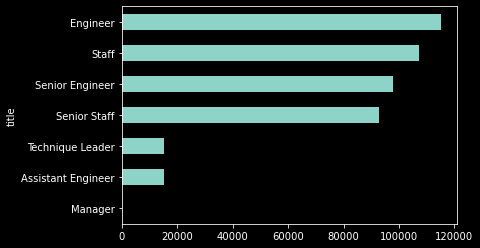

In [19]:
titles.groupby('title').emp_no.count().sort_values().plot.barh()

In [20]:
#f. Join the employees and titles dataframes together.
employees_and_titles = pd.merge(employees, titles, left_on='emp_no', right_on='emp_no', how='inner')
employees_and_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


<AxesSubplot:>

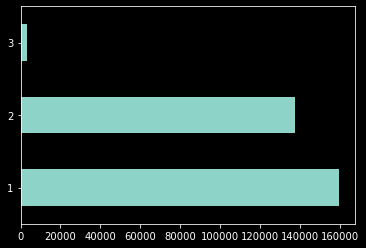

In [21]:
#g. Visualize how frequently employees change titles.
employees_and_titles.groupby('emp_no').title.count().value_counts().plot.barh()


In [22]:
#h. For each title, find the hire date of the employee that was hired most recently with that title.
employees_and_titles.groupby('title').hire_date.max()


title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [23]:
#i. Write the code necessary to create a cross tabulation of the number of titles by department.
# (Hint: this will involve a combination of SQL and python/pandas code)
cross_sql = """
select *
from employees
join dept_emp using(emp_no)
join titles using (emp_no)
join departments using(dept_no)
where dept_emp.to_date > now()
and titles.to_date > now()
"""

cross_df = pd.read_sql(cross_sql,emp_url)
cross_df.head()


,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,title,from_date,to_date,dept_name
0,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,1989-09-20,9999-01-01,Senior Staff,1996-09-20,9999-01-01,Customer Service
1,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,1992-05-04,9999-01-01,Senior Staff,2000-05-04,9999-01-01,Customer Service
2,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,1992-11-11,9999-01-01,Senior Staff,1996-05-28,9999-01-01,Customer Service
3,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,1992-03-21,9999-01-01,Senior Staff,1993-09-02,9999-01-01,Customer Service
4,d009,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,1998-05-01,9999-01-01,Staff,1998-05-01,9999-01-01,Customer Service


In [24]:
pd.crosstab( cross_df.dept_name,cross_df.title)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,11268,3574,241
Development,1652,14040,1,38816,1085,315,5477
Finance,0,0,1,0,9545,2891,0
Human Resources,0,0,1,0,9824,3073,0
Marketing,0,0,1,0,11290,3551,0
Production,1402,12081,1,33625,1123,349,4723
Quality Management,389,3405,1,9458,0,0,1293
Research,77,830,1,2250,9092,2870,321
Sales,0,0,1,0,28797,8903,0


In [25]:
#4. Use your get_db_url function to help you explore the data from the chipotle database.

db = 'chipotle'
# Use the data to answer the following questions:
chipotle_url = get_db_url(user,host,password,db)

# - What is the total price for each order?

chipotle_df = pd.read_sql('select * from orders',chipotle_url)
chipotle_df.head(10)

#string to float
chipotle_df.item_price = chipotle_df.item_price.str.replace('$','').str.replace(',','').astype('float')
chipotle_df.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [26]:
chipotle_df.groupby('order_id').item_price.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [27]:
# - What are the most popular 3 items?
chipotle_df.groupby('item_name').quantity.sum().sort_values(ascending = False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


In [28]:
# - Which item has produced the most revenue?


chipotle_df.groupby('item_name').item_price.sum().sort_values(ascending = False)

item_name
Chicken Bowl                             7342.73
Chicken Burrito                          5575.82
Steak Burrito                            3851.43
Steak Bowl                               2260.19
Chips and Guacamole                      2201.04
Chicken Salad Bowl                       1228.75
Chicken Soft Tacos                       1108.09
Veggie Burrito                            934.77
Barbacoa Burrito                          894.75
Veggie Bowl                               867.99
Carnitas Bowl                             736.71
Barbacoa Bowl                             672.36
Carnitas Burrito                          597.83
Steak Soft Tacos                          536.05
Chips                                     494.34
Chicken Crispy Tacos                      472.13
Canned Soft Drink                         438.75
Carnitas Soft Tacos                       375.94
Chips and Fresh Tomato Salsa              361.36
Steak Crispy Tacos                        357.34
6 Pack Sof

In [44]:
'''
Extra Pandas Exercises and Resources

https://www.w3resource.com/python-exercises/pandas/index.php
https://towardsdatascience.com/20-pandas-functions-that-will-boost-your-data-analysis-process-f5dfdb2f9e05
https://github.com/guipsamora/pandas_exercises
https://github.com/ajcr/100-pandas-puzzles
More Practice!

For even more practice with pandas, you can do the exercises from the SQL module, 
but instead of using SQL to do the aggregation, sorting, joining, etc, use pandas. 
That is, read the data from all of the tables into pandas dataframes and manipulate the dataframes.
'''

'\nExtra Pandas Exercises and Resources\n\nhttps://www.w3resource.com/python-exercises/pandas/index.php\nhttps://towardsdatascience.com/20-pandas-functions-that-will-boost-your-data-analysis-process-f5dfdb2f9e05\nhttps://github.com/guipsamora/pandas_exercises\nhttps://github.com/ajcr/100-pandas-puzzles\nMore Practice!\n\nFor even more practice with pandas, you can do the exercises from the SQL module, \nbut instead of using SQL to do the aggregation, sorting, joining, etc, use pandas. \nThat is, read the data from all of the tables into pandas dataframes and manipulate the dataframes.\n'